## RUN THE NEXT CELL TO GENERATE SAMPLES

#### If you want, you can modify params

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
n_samples = [10000000, 50000000]
n_features = [2,10]
centers = [10, 50]

s = n_samples[0]
c = centers[1]

for f in n_features:
    X, y = make_blobs(
        n_samples=s,
        n_features=f,
        centers=c,
        cluster_std=(0.6),
        shuffle=True
    )
    df = pd.DataFrame(X)
    scaler.fit(df)
    df = scaler.transform(df)
    df = pd.DataFrame(df)
    file_name = "input_"+str(s)+'x'+str(f)+'_'+str(c)+'.txt'
    df.to_csv(file_name, index = False, header=False)

s = n_samples[1]
c = centers[0]
f = n_features[0]
X, y = make_blobs(
    n_samples=s,
    n_features=f,
    centers=c,
    cluster_std=(0.6),
    shuffle=True
)  # For reproducibility
df = pd.DataFrame(X)
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df)
file_name = "input_"+str(s)+'x'+str(f)+'_'+str(c)+'.txt'
df.to_csv(file_name, index = False, header=False)

## Run the following cell to execute clustering algorithms (sklearn and customized one)

In [2]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

input_directory = "inputs"
input_files = []

def custom_kmeans(X, k, tolerance, max_iterations=100):
    # Inizializza i primi k centroidi
    centroids = X[:k]
    labels = np.zeros(len(X))
    
    for iteration in range(max_iterations):
        # Assegna ogni punto al cluster più vicino
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        new_labels = np.argmin(distances, axis=1)
        
        # Verifica la convergenza in base alla tolleranza
        if np.linalg.norm(new_labels - labels) == 0:
            break
        
        labels = new_labels
        
        # Calcola nuovi centroidi
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Verifica la convergenza in base alla tolleranza
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break
        
        centroids = new_centroids
    
    return centroids, labels, iteration + 1

results_sklearn = pd.DataFrame(columns=["k", "iter", "tolerance", "inputPath", "executionTime"])
results_custom = pd.DataFrame(columns=["k", "iter", "tolerance", "inputPath", "executionTime"])

for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        # Parsing dei parametri dal nome del file
        params = filename[:-4].split("_")
        k = int(params[2])
        num_el,num_features = params[1].split("x")
        
        # Legge il file .txt
        with open(""+input_directory+"/"+filename , "r") as file:
            lines = file.readlines()
        # Rimuove eventuali spazi bianchi e caratteri di nuova riga
        lines = [line.strip() for line in lines]
        # Divide le righe in base alla virgola come delimitatore
        data = [line.split(",") for line in lines]
        X = pd.DataFrame(data, columns=None).astype(float).to_numpy()
                
        tolerance = [0.001,0.00001]
        
        for t in tolerance:            
            # Esegui K-means utilizzando scikit-learn
            start_sklearn = time.time()
            kmeans_sklearn = KMeans(n_clusters=k, init='random', tol=t)
            kmeans_sklearn.fit(X)
            n_iter_sklearn = kmeans_sklearn.n_iter_
            end_sklearn = time.time()
            sklearn_time = end_sklearn - start_sklearn

            # Esegui K-means utilizzando l'implementazione personalizzata
            start_custom = time.time()
            centroids_custom, labels_custom, n_iter_custom = custom_kmeans(X, k, t)
            end_custom = time.time()
            custom_time = end_custom - start_custom

            # Aggiungi i risultati al DataFrame
            results_sklearn = results_sklearn.append({
                "k": k,
                "iter": n_iter_sklearn,
                "tolerance": t,
                "inputPath": filename,
                "executionTime": sklearn_time
            }, ignore_index=True)
            
            results_custom = results_custom.append({
                "k": k,
                "iter": n_iter_custom,
                "tolerance": t,
                "inputPath": filename,
                "executionTime": custom_time
            }, ignore_index=True)
            
            print(results_sklearn)
            print(results_custom)

    # Salva i risultati nel file "results.csv"
    results_sklearn.to_csv("results_sklearn.csv", index=False)
    results_custom.to_csv("results_custom.csv", index=False)


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9      0.001  input_1000000x2_10.txt        5.82022
    k iter  tolerance               inputPath  executionTime
0  10   12      0.001  input_1000000x2_10.txt       5.332096


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   input_1000000x2_4.txt       3.485002


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
5   4    2    0.00001   input_1000000x2_4.txt       3.579998
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   input_1000000x2_4.txt       3.485002
5   4   35    0.00001   input_1000000x2_4.txt       9.082480


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
5   4    2    0.00001   input_1000000x2_4.txt       3.579998
6  50   26    0.00100  input_1000000x2_50.txt      12.733174
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   input_1000000x2_4.txt       3.485002
5   4   35    0.00001   input_1000000x2_4.txt       9.082480
6  50   94    0.00100  input_1000000x2_50.txt     158.179408


C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
5   4    2    0.00001   input_1000000x2_4.txt       3.579998
6  50   26    0.00100  input_1000000x2_50.txt      12.733174
7  50   53    0.00001  input_1000000x2_50.txt      66.947328
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   input_1000000x2_4.txt       3.485002
5   4   35    0.00001   input_1000000x2_4.txt       9.082480
6  50   94    0.00100  i

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
5   4    2    0.00001   input_1000000x2_4.txt       3.579998
6  50   26    0.00100  input_1000000x2_50.txt      12.733174
7  50   53    0.00001  input_1000000x2_50.txt      66.947328
8  10    5    0.00100  input_100000x10_10.txt       0.874564
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   input_1000000x2_4.txt       3.485002
5   4   35    0.00001   

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


    k iter  tolerance               inputPath  executionTime
0  10    9    0.00100  input_1000000x2_10.txt       5.820220
1  10   52    0.00001  input_1000000x2_10.txt       7.554043
2  25   13    0.00100  input_1000000x2_25.txt       5.502998
3  25  117    0.00001  input_1000000x2_25.txt      32.431242
4   4    3    0.00100   input_1000000x2_4.txt       2.129997
5   4    2    0.00001   input_1000000x2_4.txt       3.579998
6  50   26    0.00100  input_1000000x2_50.txt      12.733174
7  50   53    0.00001  input_1000000x2_50.txt      66.947328
8  10    5    0.00100  input_100000x10_10.txt       0.874564
9  10    4    0.00001  input_100000x10_10.txt       0.892996
    k iter  tolerance               inputPath  executionTime
0  10   12    0.00100  input_1000000x2_10.txt       5.332096
1  10  100    0.00001  input_1000000x2_10.txt      42.320454
2  25   68    0.00100  input_1000000x2_25.txt      60.520353
3  25  100    0.00001  input_1000000x2_25.txt      99.948073
4   4   13    0.00100   

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
     k iter  tolerance               inputPath  executionTime
0   10   12    0.00100  input_1000000x2_10.txt       5.332096
1   10  100    0.00001  input_1000000x2_10.txt      42.320454
2   25   68    0.00100  input_1000000x2_25.txt      60.520353
3   25  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
     k iter  tolerance               inputPath  executionTime
0   10   12    0.00100  input_1000000x2_10.txt       5.332096
1   10  100    0.00001  input_1000000x2_10.txt      42.320454
2   25  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
     k iter  tolerance               inputPath  executionTime
0   10   12    0.00100  input_1000000x2_10.txt       5.332096
1   10  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
     k iter  tolerance               inputPath  executionTime
0   10  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
     k i

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:29: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({
C:\Users\david\anaconda3\envs\DMML\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     k iter  tolerance               inputPath  executionTime
0   10    9    0.00100  input_1000000x2_10.txt       5.820220
1   10   52    0.00001  input_1000000x2_10.txt       7.554043
2   25   13    0.00100  input_1000000x2_25.txt       5.502998
3   25  117    0.00001  input_1000000x2_25.txt      32.431242
4    4    3    0.00100   input_1000000x2_4.txt       2.129997
5    4    2    0.00001   input_1000000x2_4.txt       3.579998
6   50   26    0.00100  input_1000000x2_50.txt      12.733174
7   50   53    0.00001  input_1000000x2_50.txt      66.947328
8   10    5    0.00100  input_100000x10_10.txt       0.874564
9   10    4    0.00001  input_100000x10_10.txt       0.892996
10  25    7    0.00100  input_100000x10_25.txt       0.617000
11  25   18    0.00001  input_100000x10_25.txt       2.859530
12   4    3    0.00100   input_100000x10_4.txt       0.425999
13   4    3    0.00001   input_100000x10_4.txt       0.651003
14  50   13    0.00100  input_100000x10_50.txt       1.348000
15  50  

C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sklearn = results_sklearn.append({
C:\Users\david\AppData\Local\Temp\ipykernel_10528\1681528478.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_custom = results_custom.append({


## Run the next cells to analyze the results

In [24]:
import re
import pandas as pd

def calculate_complexity(row):
    n,f,k = extract_feat(row['inputPath'])
    return  n*f*k 

def samples(row):
    n,_,_ = extract_feat(row['inputPath'])
    return  n

def features(row):
    _,f,_ = extract_feat(row['inputPath'])
    return  f

def extract_feat(string):
    regex = r"(\d+)x(\d+)_(\d+)"
    n = 0
    f = 0
    k = 0
    match = re.search(regex, string)
    if match:
        n = int(match.group(1))
        f = int(match.group(2))
        k = int(match.group(3))
    return n,f,k

results_sklearn = pd.read_csv("results_sklearn.csv")
results_custom = pd.read_csv("results_custom.csv")
resuts_mapreduce=pd.read_csv("results.csv")

results_sklearn['complexity'] = results_sklearn.apply(calculate_complexity, axis=1)
results_sklearn['samples'] = results_sklearn.apply(samples, axis=1)
results_sklearn['features'] = results_sklearn.apply(features, axis=1)

results_custom['complexity'] = results_custom.apply(calculate_complexity, axis=1)
results_custom['samples'] = results_custom.apply(samples, axis=1)
results_custom['features'] = results_custom.apply(features, axis=1)

resuts_mapreduce['complexity'] = resuts_mapreduce.apply(calculate_complexity, axis=1)
resuts_mapreduce['samples'] = resuts_mapreduce.apply(samples, axis=1)
resuts_mapreduce['features'] = resuts_mapreduce.apply(features, axis=1)

In [26]:
results_sklearn = results_sklearn.sort_values(by=['complexity','samples','features','k']).reset_index(drop=True)
results_custom = results_custom.sort_values(by=['complexity','samples','features','k']).reset_index(drop=True)
resuts_mapreduce = resuts_mapreduce.sort_values(by=['complexity','samples','features','k']).reset_index(drop=True)

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

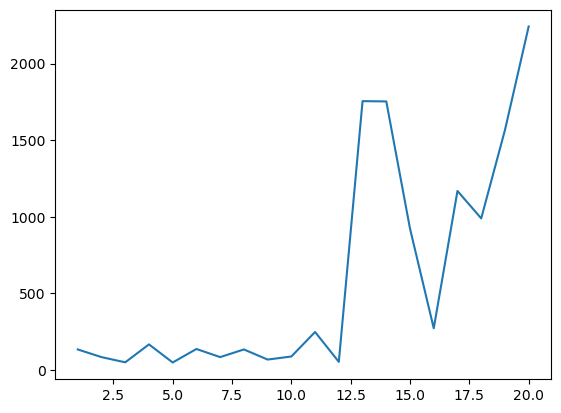

In [39]:
plt.plot(range(1, 21), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.001) & (resuts_mapreduce['numReducers'] == 1)]['executionTime'], label="1 reducer")
#plt.plot(range(1, 21), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.001) & (resuts_mapreduce['numReducers'] == 3)]['executionTime'], label="3 reducer")
plt.plot(range(1, 21), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.00001) & (resuts_mapreduce['numReducers'] == 1)]['executionTime'], label="1 reducer")
#plt.plot(range(1, 21), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.00001) & (resuts_mapreduce['numReducers'] == 3)]['executionTime'], label="3 reducer")
plt.yticks(np.arange(0.25, 160.0, 10.0))
plt.ylabel("seconds")
plt.legend()
plt.title("Execution time")
plt.grid()
plt.show()
plt.savefig("ExecutionTimeComplexity.png")

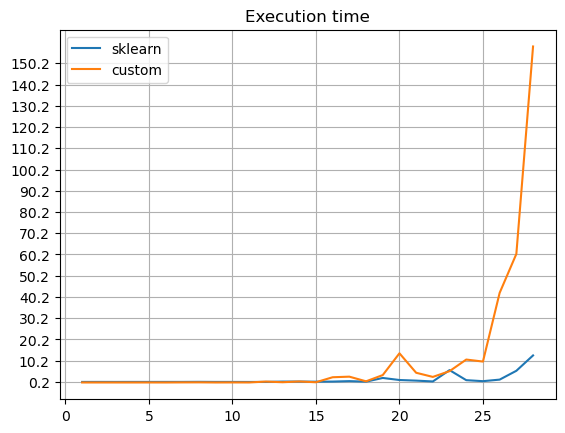

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(1,29),results_sklearn[results_sklearn['tolerance'] == 0.001]['executionTime'], label = "sklearn")
plt.plot(range(1,29),results_custom[results_custom['tolerance'] == 0.001]['executionTime'], label = "custom")
plt.plot(range(1, 29), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.001) & (resuts_mapreduce['numReducers'] == 1)]['executionTime'], label="1 reducer")
plt.plot(range(1, 29), resuts_mapreduce[(resuts_mapreduce['tolerance'] == 0.001) & (resuts_mapreduce['numReducers'] == 3)]['executionTime'], label="3 reducer")
plt.yticks(np.arange(0.25, 160.0, 10.0))
plt.ylabel("seconds")
plt.legend()
plt.title("Execution time")
plt.grid()
plt.show()
plt.savefig("ExecutionTimeOtherAlgorithms.png")

In [9]:
import os

folder_path = './'  # Percorso della cartella contenente i file

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        old_path = os.path.join(folder_path, filename)
        new_filename = os.path.splitext(filename)[0] + '.txt'
        new_path = os.path.join(folder_path, new_filename)
        os.rename(old_path, new_path)

In [6]:
import pandas as pd
df = pd.read_csv('input_10000000x2_50.csv',header=None)
df.columns

Int64Index([0, 1], dtype='int64')

In [2]:
df.head(2)

,0,1
0,0.419749,0.786470
1,0.336252,0.738753


In [7]:
from sklearn.cluster import KMeans
# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=50, init= 'random',max_iter=100, tol = 0.00001)
kmeans.fit(df)
'''
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters with centroids
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points
colors = cm.nipy_spectral(labels.astype(float) / 4)
ax.scatter(df[0], df[1], marker='o', s=30, c=colors)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Clusters with Centroids')

plt.legend()
plt.show()
'''

"\n# Get the cluster labels and centroids\nlabels = kmeans.labels_\ncentroids = kmeans.cluster_centers_\n\n# Plotting the clusters with centroids\nfig, ax = plt.subplots(figsize=(8, 6))\n\n# Plot the data points\ncolors = cm.nipy_spectral(labels.astype(float) / 4)\nax.scatter(df[0], df[1], marker='o', s=30, c=colors)\n\n# Plot the centroids\nax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')\n\nax.set_xlabel('Feature 1')\nax.set_ylabel('Feature 2')\nax.set_title('Clusters with Centroids')\n\nplt.legend()\nplt.show()\n"

In [8]:
centroids = kmeans.cluster_centers_
centroids

array([[0.13711951, 0.84893767],
       [0.39362224, 0.10957301],
       [0.440569  , 0.24625851],
       [0.56285215, 0.81489782],
       [0.32066948, 0.42594451],
       [0.63705706, 0.64118355],
       [0.87284401, 0.86739796],
       [0.4195524 , 0.73441322],
       [0.90090007, 0.51722194],
       [0.23502062, 0.89180622],
       [0.51900235, 0.70265691],
       [0.29103596, 0.40046633],
       [0.71485418, 0.23252249],
       [0.18862629, 0.34533786],
       [0.435964  , 0.61271989],
       [0.12544365, 0.29451973],
       [0.28483089, 0.170278  ],
       [0.38850751, 0.7824653 ],
       [0.35512973, 0.11857912],
       [0.83224831, 0.21273195],
       [0.65692039, 0.1305606 ],
       [0.22210636, 0.58939089],
       [0.7465423 , 0.37799378],
       [0.5445227 , 0.48199046],
       [0.46063299, 0.85651979],
       [0.50328587, 0.26556864],
       [0.26633926, 0.21717627],
       [0.82382808, 0.29951479],
       [0.86554144, 0.76561952],
       [0.10199334, 0.68998934],
       [0.

In [5]:
kmeans.n_iter_

2